In [2]:
import sys; sys.path.append('..')

from polarization import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementation notes

The only-opinion-condition will not really benefit from this analysis for the following reason: We know that the FM model will result in a move towards consensus when agents are matched via heterophily because agent opinions are $\pm0.3$. Curiously, this would be the same in the MF2013 model with positive and negative influence, but Figure 4 shows polarization emerges under heterophilous matching---a crucial part of their argument that this evidence shows a negative influence assumption does not match their observations. However, according to Equation (5), influence becomes negative only when the absolute difference between two agents' opinions is greater than 1. But agents are $|.3 - (-.3)| = 0.6$ apart, so why do opinions diverge in Figure 4?

Nonetheless, I do think it will be worthwhile to use FM2011 to model the only-argument condition. I believe the same behavior can be observed in terms of opinion shifts, and this will be an opportunity to demonstrate how an alternative model can be adapted to a new experimental situation.

The next step of the Mäs & Flache (2013) model is to calculate the average opinon of the two groups for each timestep, as well as the overall polarization in opinion. The first step of this is to sum over all $K=12$ elements of each agent's argument vector to get a value between -1 and 1, representing their total opinion on the issue---in the paper the issue is whether to build a recreation center in one town or another. 

Then the authors calculated the mean opinions of both groups and the "average degree of bi-polarization" at each of the 7 interaction rounds (timesteps). I suppose this reveals that for each timestep, the averaging is done both over groups and over trials. 

I'm going to make a single run of mas_flache_2013() return the timeseries of all eight agents' arguments for a single run. Can take average successively over runs.

[4 0]
[1 5]
[0 4]
[3 0]
[0.33       0.3784605  0.41338776 0.43704028 0.3587788  0.09546674
 0.04217105 0.0392694 ]
[-0.33       -0.3784605  -0.4233701  -0.43857601 -0.340332   -0.01814634
  0.03940923  0.04250252]
[[ 0.    0.    0.33  0.    0.    0.    0.    0.    0.   -0.33 -0.33  0.  ]
 [ 0.    0.    0.33  0.    0.    0.   -0.33  0.   -0.33  0.    0.    0.  ]
 [ 0.    0.    0.33  0.    0.    0.    0.   -0.33 -0.33  0.    0.    0.  ]
 [ 0.    0.    0.33  0.    0.    0.    0.    0.   -0.33  0.   -0.33  0.  ]]


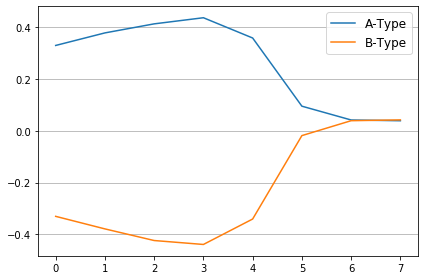

In [185]:
n_trials = 10
n_agents = 8
n_arguments = 12
n_timesteps = 8  # initial + 7 add'l

results = np.zeros((n_trials, n_timesteps, n_agents), dtype=float)
bi_polarization_mean = 0.0

# for idx in range(n_trials):
    
res = mas_flache_2013()

print(res['A'].sum(axis=2).mean(axis=1))
# print(res['A'].sum(axis=2).reshape((4, 8)))
print(res['B'].sum(axis=2).mean(axis=1))


a_series = res['A'].sum(axis=2).mean(axis=1)
b_series = res['B'].sum(axis=2).mean(axis=1)
plt.plot(a_series, label='A-Type')
plt.plot(b_series, label='B-Type')
plt.legend(prop={'size': 12})
plt.grid(axis='y')

print(res['B'][0])

plt.plot(polarization)

[8.88178420e-16 1.30750621e-02 1.49916095e-02 1.70539446e-02
 1.54086617e-02 1.98903083e-02 1.94714761e-02 1.95590414e-02]


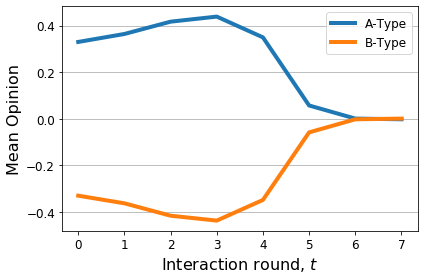

In [221]:
n_trials = 100
n_agents = 8
n_arguments = 12
n_timesteps = 8  # initial + 7 add'l

results = np.zeros((n_trials, n_timesteps, n_agents), dtype=float)
bi_polarization_mean = 0.0

# for idx in range(n_trials):

# Keep mean of agent opinions for A and B types.
a_means = np.zeros((n_trials, n_timesteps))
b_means = np.zeros((n_trials, n_timesteps))
# Track polarization at each timestep across trials.
polarizations = np.zeros((n_trials, n_timesteps))

for idx in range(n_trials):
    res = mas_flache_2013()
    a_means[idx] = res['A'].sum(axis=2).mean(axis=1)
    b_means[idx] = res['B'].sum(axis=2).mean(axis=1)
    polarizations[idx] = polarization_series(res)
    
a_mean = a_means.mean(axis=0)
b_mean = b_means.mean(axis=0)
a_std = a_means.std(axis=0)
b_std = b_means.std(axis=0)

mean_polarization = polarizations.mean(axis=0)

print(a_means.std(axis=0))

x = np.arange(n_timesteps)

# plt.plot(x, a_mean, marker='o', lw=4, ms=6, label='A-Type')
# plt.plot(x, b_mean, marker='o', lw=4, ms=6, label='B-Type')
plt.plot(x, a_mean, lw=4, ms=6, label='A-Type')
plt.plot(x, b_mean, lw=4, ms=6, label='B-Type')
plt.legend(prop={'size': 12})
plt.grid(axis='y')
plt.ylabel('Mean Opinion', size=16)
plt.xlabel('Interaction round, $t$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
# plt.grid(axis='both')

plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/MeanOpinionVsTime_MF2013.pdf')

In [184]:
from mas_flache_2013 import polarization_series
polarization = polarization_series(res)
polarization

array([1.08900000e-01, 1.27204054e-01, 1.65157281e-01, 1.72883531e-01,
       1.32408534e-01, 5.73434993e-03, 5.17301703e-05, 1.55360768e-06])

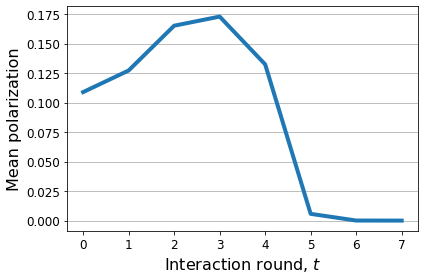

In [220]:
# plt.plot(polarization, marker='o', lw=4, ms=6)
plt.plot(polarization, lw=4, ms=6)
plt.ylabel('Mean polarization', size=16)  # (opinion population variance)', size=16)
plt.xlabel('Interaction round, $t$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(axis='y')
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/PolarizationVsTime_MF2013.pdf')